# Load Dataset

In [2]:
import re, string
import pandas as pd
from tqdm import tqdm
import nltk

tqdm.pandas()

In [3]:
df = pd.read_csv('../dataset/indonesian-news-title.csv')

In [4]:
df.head()

,date,url,title,category
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance


## Analysis

In [5]:
# Total rows in each category
df['category'].value_counts()

news       32360
hot        16330
finance    14168
travel      6466
inet        5640
health      4919
oto         4383
food        4315
sport       2436
Name: category, dtype: int64

In [6]:
# Get average words in each category
df['word_count'] = df['title'].apply(lambda x: len(x.split()))
df.groupby('category')['word_count'].mean()

category
finance     8.494001
food       10.707068
health      9.733889
hot         9.100796
inet        8.015071
news       10.043850
oto         8.791923
sport       8.158046
travel      8.131457
Name: word_count, dtype: float64

In [7]:
# Get average characters in each category
df['char_count'] = df['title'].apply(lambda x: len(str(x)))
df.groupby('category')['char_count'].mean()

category
finance    54.488354
food       66.314253
health     63.867249
hot        59.409063
inet       52.488830
news       65.721508
oto        57.179101
sport      54.797619
travel     53.277761
Name: char_count, dtype: float64

In [8]:
# Is there any duplicated rows?
df[df['title'].duplicated()]

,date,url,title,category,word_count,char_count
1906,04/17/2020,https://finance.detik.com/detiktv/d-4980330/bl...,Blak-blakan Kartu Pra Kerja dan 'Nepotisme' de...,finance,9,62
3299,04/20/2020,https://finance.detik.com/detiktv/d-4983283/me...,Menteri Perdagangan Buka Kartu Stok Sembako Sa...,finance,8,55
3732,03/09/2020,https://finance.detik.com/market-research/d-49...,IHSG Diperkirakan Melemah di Awal Pekan,finance,6,39
5613,03/11/2020,https://finance.detik.com/berita-ekonomi-bisni...,Harga Emas Antam Turun Rp 3.000,finance,6,31
5779,01/22/2020,https://finance.detik.com/fintech/d-4868943/lo...,Lokasi Kantor Jadi Syarat Pinjol Dapat Izin OJK,finance,8,47
...,...,...,...,...,...,...
89764,01/18/2020,https://travel.detik.com/fototravel/d-4864101/...,Aksi Para Penunggang Kuda Menerobos Kobaran Ap...,travel,9,58
89932,04/03/2020,https://travel.detik.com/travel-news/d-4963492...,Rasakan Kenyamanan Work From Hotel di Fraser R...,travel,9,62
90206,06/03/2020,https://travel.detik.com/travel-news/d-5039514...,"New Normal, VW Cabrio Borobudur Siap Sambut Wi...",travel,8,53
90444,04/14/2020,https://travel.detik.com/fototravel/d-4977157/...,5 Negara yang Diprediksi Paling Cepat Bangkit ...,travel,9,57


In [9]:
len(df[df['title'].duplicated()])

126

# Preprocessing

## Remove some label

In [10]:
# I will delete "news" and "hot" category to remove any overlapping category
df.drop(df[df.category == 'news'].index, inplace=True)
df.drop(df[df.category == 'hot'].index, inplace=True)

# See category stats
df['category'].value_counts()

finance    14168
travel      6466
inet        5640
health      4919
oto         4383
food        4315
sport       2436
Name: category, dtype: int64

## Remove duplicates

In [11]:
df.drop(df[df['title'].duplicated()].index, inplace=True)
df['title']

0                           Kemnaker Awasi TKA di Meikarta
1                        BNI Digitalkan BNI Java Jazz 2020
2        Terbang ke Australia, Edhy Prabowo Mau Genjot ...
3        OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...
4        Saran Buat Anies-RK yang Mangkir Rapat Banjir ...
                               ...                        
91012    Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...
91013    Foto: Bali & 9 Destinasi Paling Instagramable ...
91014    Game Bikin Turis Ini Liburan ke Jepang untuk.....
91015    Sekeluarga Didepak dari Pesawat, Maskapai Bila...
91016    Kapal Raib di Segitiga Bermuda, Nyaris Seabad ...
Name: title, Length: 42264, dtype: object

## Cleaning Text

In [12]:
# Cleaning
def cleaning(text):
  # Case folding
  text = text.lower() 
  # Trim text
  text = text.strip()
  # Remove punctuations, special characters, and double whitespace
  text = re.compile('<.*?>').sub('', text) 
  text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
  text = re.sub('\s+', ' ', text)
  # Number removal
  text = re.sub(r'\[[0-9]*\]', ' ', text) 
  text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
  # Remove number and whitespaces
  text = re.sub(r'\d', ' ', text)
  text = re.sub(r'\s+', ' ', text)

  return text

In [13]:
df['title'] = df['title'].apply(lambda x: cleaning(x))
df['title']

0                           kemnaker awasi tka di meikarta
1                            bni digitalkan bni java jazz 
2        terbang ke australia edhy prabowo mau genjot b...
3        ojk siapkan stimulus ekonomi antisipasi dampak...
4        saran buat anies rk yang mangkir rapat banjir ...
                               ...                        
91012    ketumpahan air panas di pesawat kamu bisa tunt...
91013      foto bali destinasi paling instagramable tahun 
91014    game bikin turis ini liburan ke jepang untuk c...
91015    sekeluarga didepak dari pesawat maskapai bilan...
91016    kapal raib di segitiga bermuda nyaris seabad b...
Name: title, Length: 42264, dtype: object

## Tokenizing

In [14]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['title'].apply(lambda x: word_tokenize(x))
df['tokens']

0                     [kemnaker, awasi, tka, di, meikarta]
1                       [bni, digitalkan, bni, java, jazz]
2        [terbang, ke, australia, edhy, prabowo, mau, g...
3        [ojk, siapkan, stimulus, ekonomi, antisipasi, ...
4        [saran, buat, anies, rk, yang, mangkir, rapat,...
                               ...                        
91012    [ketumpahan, air, panas, di, pesawat, kamu, bi...
91013    [foto, bali, destinasi, paling, instagramable,...
91014    [game, bikin, turis, ini, liburan, ke, jepang,...
91015    [sekeluarga, didepak, dari, pesawat, maskapai,...
91016    [kapal, raib, di, segitiga, bermuda, nyaris, s...
Name: tokens, Length: 42264, dtype: object

## Stopwords removal

In [15]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

df['tokens'].apply(lambda x: [w for w in x if not w in stop_words])

0                         [kemnaker, awasi, tka, meikarta]
1                       [bni, digitalkan, bni, java, jazz]
2        [terbang, australia, edhy, prabowo, genjot, bu...
3        [ojk, siapkan, stimulus, ekonomi, antisipasi, ...
4          [saran, anies, rk, mangkir, rapat, banjir, dpr]
                               ...                        
91012    [ketumpahan, air, panas, pesawat, tuntut, mask...
91013               [foto, bali, destinasi, instagramable]
91014    [game, bikin, turis, liburan, jepang, cari, ya...
91015    [sekeluarga, didepak, pesawat, maskapai, bilan...
91016     [kapal, raib, segitiga, bermuda, seabad, ketemu]
Name: tokens, Length: 42264, dtype: object

## Lemmatizer

In [16]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
 
df['tokens'] = df['tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))
df['tokens']

100%|██████████████████████████████████████████████████████████████████████████| 42264/42264 [00:04<00:00, 8733.36it/s]


0                      [kemnaker, awas, tka, di, meikarta]
1                          [bni, digital, bni, java, jazz]
2        [terbang, ke, australia, edhy, prabowo, mau, g...
3        [ojk, siap, stimulus, ekonomi, antisipasi, dam...
4        [saran, buat, anies, rk, yang, mangkir, rapat,...
                               ...                        
91012    [tumpah, air, panas, di, pesawat, kamu, bisa, ...
91013    [foto, bal, destinasi, paling, instagramable, ...
91014    [game, bikin, turis, ini, libur, ke, jepang, u...
91015    [keluarga, depak, dari, pesawat, maskapai, bil...
91016    [kapal, raib, di, segitiga, muda, nyaris, abad...
Name: tokens, Length: 42264, dtype: object

# Split Data

In [17]:
from sklearn.model_selection import train_test_split

df['joined_tokens'] = df['tokens'].apply(lambda x: ' '.join(x))
X_train, X_test, y_train, y_test = train_test_split(df['joined_tokens'], df['category'], test_size=0.3, random_state=42)

# Feature Extraction

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=True, min_df=0.0001, max_df=0.02, lowercase=False)

X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

print('Train size: ', X_train_vectors_tfidf.shape)
print('Test size: ', X_test_vectors_tfidf.shape)

Train size:  (29584, 6379)
Test size:  (12680, 6379)


# Resampling

In [ ]:
y_train.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_vectors_tfidf, y_train)

# Training Model

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [72]:
clf = SVC(kernel='rbf', probability=True)
clf.fit(X_train_vectors_tfidf, y_train)

SVC(probability=True)

In [73]:
y_pred = clf.predict(X_test_vectors_tfidf)

In [74]:
print('Accuracy score : ', accuracy_score(y_test, y_pred))
print('Precision score : ', precision_score(y_test, y_pred, average='weighted'))
print('Recall score : ', recall_score(y_test, y_pred, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred, average='weighted'))

Accuracy score :  0.8504731861198738
Precision score :  0.852891088269706
Recall score :  0.8504731861198738
F1 score :  0.8493659692147594


# Result

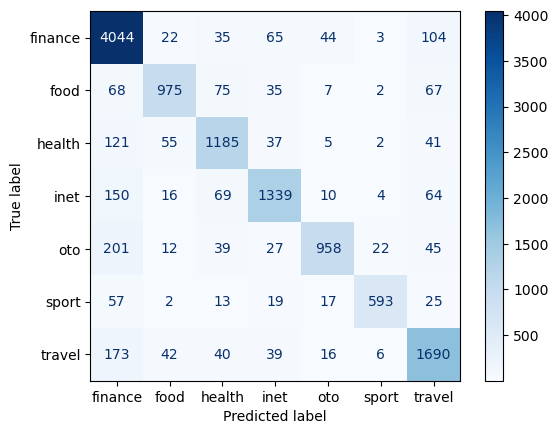

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     finance       0.84      0.94      0.89      4317
        food       0.87      0.79      0.83      1229
      health       0.81      0.82      0.82      1446
        inet       0.86      0.81      0.83      1652
         oto       0.91      0.73      0.81      1304
       sport       0.94      0.82      0.87       726
      travel       0.83      0.84      0.84      2006

    accuracy                           0.85     12680
   macro avg       0.86      0.82      0.84     12680
weighted avg       0.85      0.85      0.85     12680



# Export Model

In [123]:
import pickle

with open('../model/model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [45]:
with open('../model/vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Export Data

In [27]:
df.to_csv('../dataset/train_preprocess.csv')

# Test on Sample Text

In [145]:
texts = [
    "Wishnutama Mau Sewa Influencer Asing, Pakai BTS?",
    "7 Manfaat Konsumsi Kurma Bagi Tubuh Saat Berbuka Puasa",
    "Mobil Terbakar karena Simpan Power Bank",
    "Video: Huawei Watch GT2e Resmi Hadir di Indonesia,inet",
    "MA Batalkan Kenaikan Iuran, BPJS Kesehatan Siap Kembalikan Selisih Pembayaran",
    "Kylian Mbappe akan segera meninggalkan Real Madrid pada bursa transfer musim dingin",
    "Charles Leclerc masih kesulitan dalam mengangkat performa Ferrari pada musim ini",
    "Diumumkan Siang Ini, Ekonom Perkirakan Bank Indonesia Tahan Suku Bunga Acuan",
    "Mau Liburan 5 Hari  ke Jepang Lihat Sakura? Yuk Simak Itinerary-nya"
]

In [146]:
text_raw = texts[-1]
text = cleaning(text_raw)
text = tfidf_vectorizer.transform([text]) 
text

<1x6379 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [147]:
sample_predict = clf.predict(text)
output = sample_predict[0]

probability = clf.predict_proba(text)
output_probability = "{:.5f}".format(float(probability[0][probability.argmax()]))
probability[0]

array([0.00699436, 0.00327168, 0.00127608, 0.00186845, 0.00703511,
       0.00153522, 0.97801909])

In [148]:
result = {'text': text_raw, 'class': output, 'score': output_probability}
result

{'text': 'Mau Liburan 5 Hari  ke Jepang Lihat Sakura? Yuk Simak Itinerary-nya',
 'class': 'travel',
 'score': '0.97802'}

In [149]:
df['category'].unique()

array(['finance', 'food', 'health', 'inet', 'oto', 'sport', 'travel'],
      dtype=object)